In [24]:
%load_ext autoreload
%autoreload 2

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from operator import itemgetter
# from sklearn.tree import _tree
import sklearn.metrics as metrics
# import pandas as pd
import matplotlib.pyplot as plt
import functions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
target_a = 'TARGET_BAD_FLAG'
target_b = 'IMP_TARGET_LOSS_AMT'

In [26]:
df = functions.clean_df(file_path= '../../data_sets/SA_clean_HMEQ_Loss.csv', remove_cols=['z_JOB', 'z_REASON'])

In [27]:
train_cols = list(df.columns.difference((target_a, target_b)))
x_train, x_test, y_train, y_test = functions.split_df(df = df.copy(), train_cols=train_cols, 
test_cols = [target_a, target_b], test_size=0.2, rand_seed=1)

### Classification

In [28]:
fm01_RF = RandomForestClassifier(n_estimators=100, random_state=1)
fm01_RF = fm01_RF.fit(x_train, y_train[target_a])

In [29]:
rm_pred_train = fm01_RF.predict( x_train )
rm_pred_test = fm01_RF.predict(x_test )

In [30]:
#extracting probabi;ities
RF_prob_train= fm01_RF.predict_proba(x_train)
RF_prob_test= fm01_RF.predict_proba(x_test)

#keeping prob of default only
RF_p1_train= RF_prob_train[:,1]
RF_p1_test= RF_prob_test[:,1]

In [31]:
#checking accuracy predictions
#better on test than decision tree
print('Train Accuracy:', metrics.accuracy_score(y_train[target_a],rm_pred_train),'\n',
'Test Accuracy:',  metrics.accuracy_score(y_test[target_a],rm_pred_test))

Train Accuracy: 1.0 
 Test Accuracy: 0.915268456375839


In [32]:
#developing ROC curve
RF_fpr_train, RF_tpr_train, threshold_train = metrics.roc_curve(y_train[target_a], RF_p1_train)
RF_fpr_test, RF_tpr_test, threshold_test = metrics.roc_curve(y_test[target_a], RF_p1_test)

#AUC
RF_roc_auc_train = metrics.auc(RF_fpr_train, RF_tpr_train )
RF_roc_auc_test = metrics.auc(RF_fpr_test, RF_tpr_test)

c:\Users\salma\OneDrive\Desktop\Salma\NW\practical_machine_learning\Code\Module_2\functions.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_test, tpr_test, 'b', label = f'AUC TEST:{round(roc_auc_test,2)}', color="red")


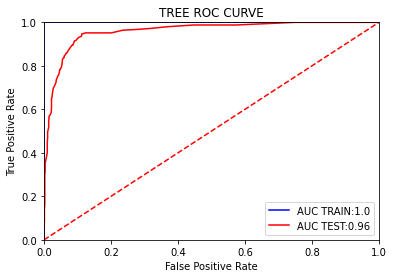

In [38]:


functions.plot_roc(fpr_train = RF_fpr_train, tpr_train= RF_tpr_train, fpr_test= RF_fpr_test, tpr_test= RF_tpr_test,
 roc_auc_train= RF_roc_auc_train, roc_auc_test= RF_roc_auc_test )

### Regression

In [41]:
fm01_RFR = RandomForestRegressor(n_estimators=100, random_state=1)
fm01_RFR = fm01_RFR.fit(x_train, y_train[target_a])

In [42]:
rfr_pred_train = fm01_RFR.predict( x_train )
rfr_pred_test = fm01_RFR.predict(x_test )

In [43]:
# Error Metric
rfr_train_rmse =metrics.mean_squared_error(y_train[target_b], rfr_pred_train)**0.5
rfr_test_rmse = metrics.mean_squared_error(y_test[target_b], rfr_pred_test)**0.5

In [44]:
rfr_train_rmse, rfr_test_rmse

(7613.20043733501, 8045.609840465157)

In [45]:
dict(zip(x_train.columns, fm01_RFR.feature_importances_))

{'IMP_CLAGE': 0.0964413695781914,
 'IMP_CLNO': 0.05716965941043292,
 'IMP_DEBTINC': 0.11340403411534,
 'IMP_DELINQ': 0.0601069056751443,
 'IMP_DEROG': 0.02443210867251818,
 'IMP_LOAN': 0.06144311930098189,
 'IMP_MORTDUE': 0.06023250084890488,
 'IMP_NINQ': 0.027344361332827617,
 'IMP_VALUE': 0.0651966966176241,
 'IMP_YOJ': 0.054131017996263256,
 'flag_CLAGE': 0.003840614508777589,
 'flag_CLNO': 0.0014803244352742427,
 'flag_DEBTINC': 0.3004399276971758,
 'flag_DELINQ': 0.0021271115075311444,
 'flag_DEROG': 0.008580305314133318,
 'flag_LOAN': 0.0,
 'flag_MORTDUE': 0.002517036078509915,
 'flag_NINQ': 0.003167261921022782,
 'flag_VALUE': 0.015614114570153896,
 'flag_YOJ': 0.008160296340675275,
 'z_JOB_Office': 0.007343370231809016,
 'z_JOB_Other': 0.006619850181574448,
 'z_JOB_ProfExe': 0.005347738397074202,
 'z_JOB_Sales': 0.005661734938298881,
 'z_JOB_Self': 0.0029350758127582133,
 'z_REASON_HomeImp': 0.006263464517002814}